In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/content/datafile.csv')
df2 = pd.read_csv('/content/datafile (1).csv')
df3 = pd.read_csv('/content/datafile (2).csv')
df4 = pd.read_csv('/content/datafile (3).csv')
df5 = pd.read_csv('/content/datafile (4).csv')
df6 = pd.read_csv('/content/EVIndia.csv')

In [3]:
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())
print(df6.head())

  Sl. No.             State/UT  No. of Operational PCS
0       1  Andaman and Nicobar                       3
1       2       Andhra Pradesh                     222
2       3    Arunachal Pradesh                       9
3       4                Assam                      48
4       5                Bihar                      83
  Category  Vehicles to be Supported (in No.)  \
0     e-2W                            1000000   
1     e-3W                             500000   
2     e-4W                              55000   
3  e-Buses                               7090   
4    Total                            1562090   

   Actual Vehicles Supported (in No.)  
0                              792529  
1                               81172  
2                                6831  
3                                2435  
4                              882967  
       National Highway  No. of Operational PCS
0   National Highway-10                       1
1   National Highway-11                

#EDA

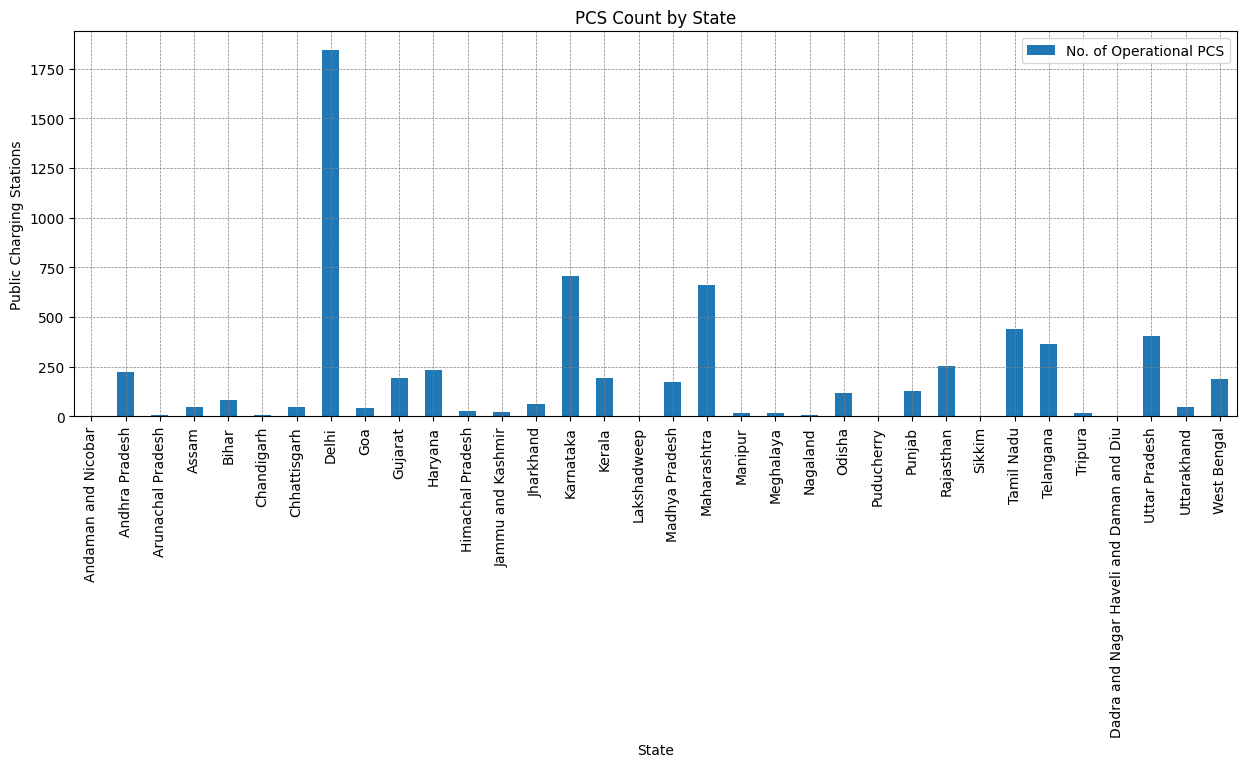

In [4]:
#Barchart of No. of Operational PCS on y axis and State/UT on x axis
x= df1[df1['State/UT'] != 'Total'].plot(x='State/UT', y='No. of Operational PCS', kind='bar',figsize = (15,5))
x.grid(color='grey', linestyle='--', linewidth=0.5)

# Setting labels and title
plt.xlabel('State')
plt.ylabel('Public Charging Stations')
plt.title('PCS Count by State')
plt.show()

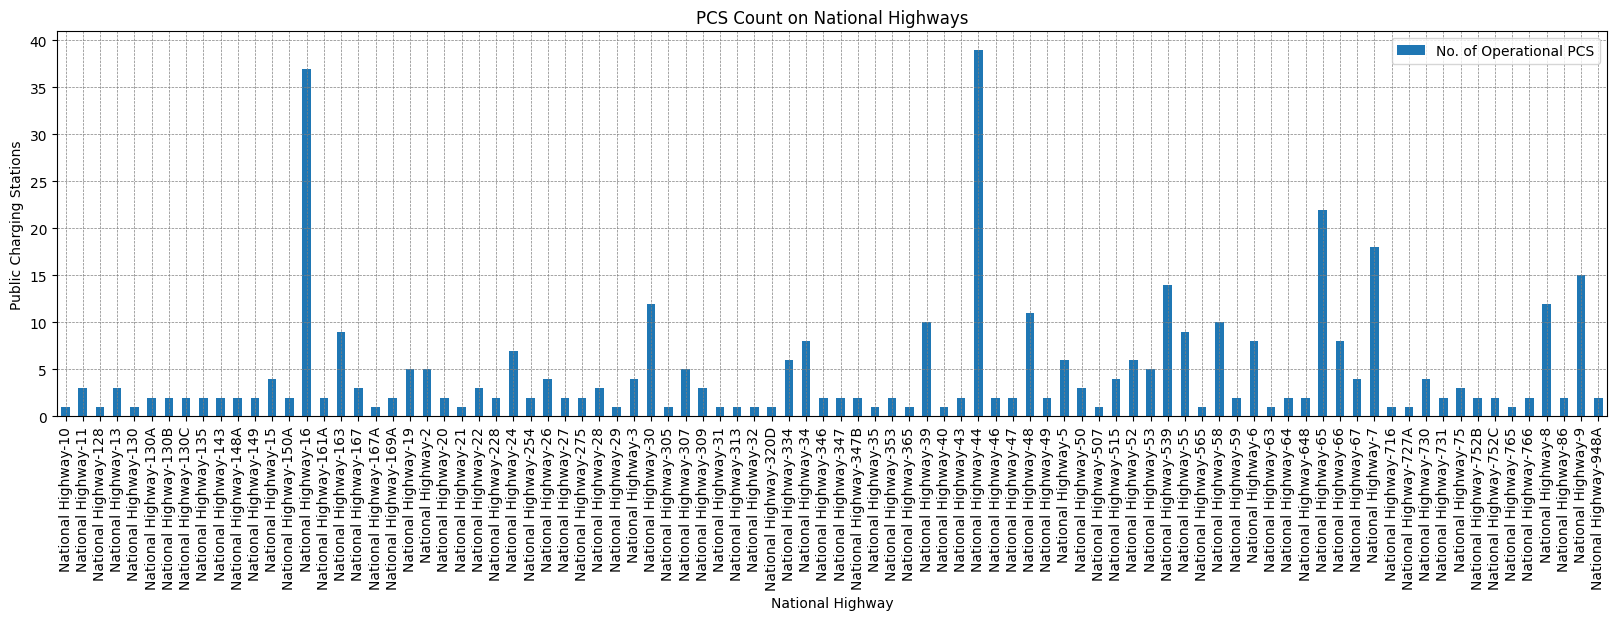

In [5]:
#Barchart of No. of Operational PCS on y axis and National Highway on x axis
x=df3[df3['National Highway'] != 'Total'].plot(x='National Highway',y='No. of Operational PCS', kind='bar',figsize = (20,5))
x.grid(color='grey', linestyle='--', linewidth=0.5)

# Setting labels and title
plt.xlabel('National Highway')
plt.ylabel('Public Charging Stations')
plt.title('PCS Count on National Highways')
plt.show()

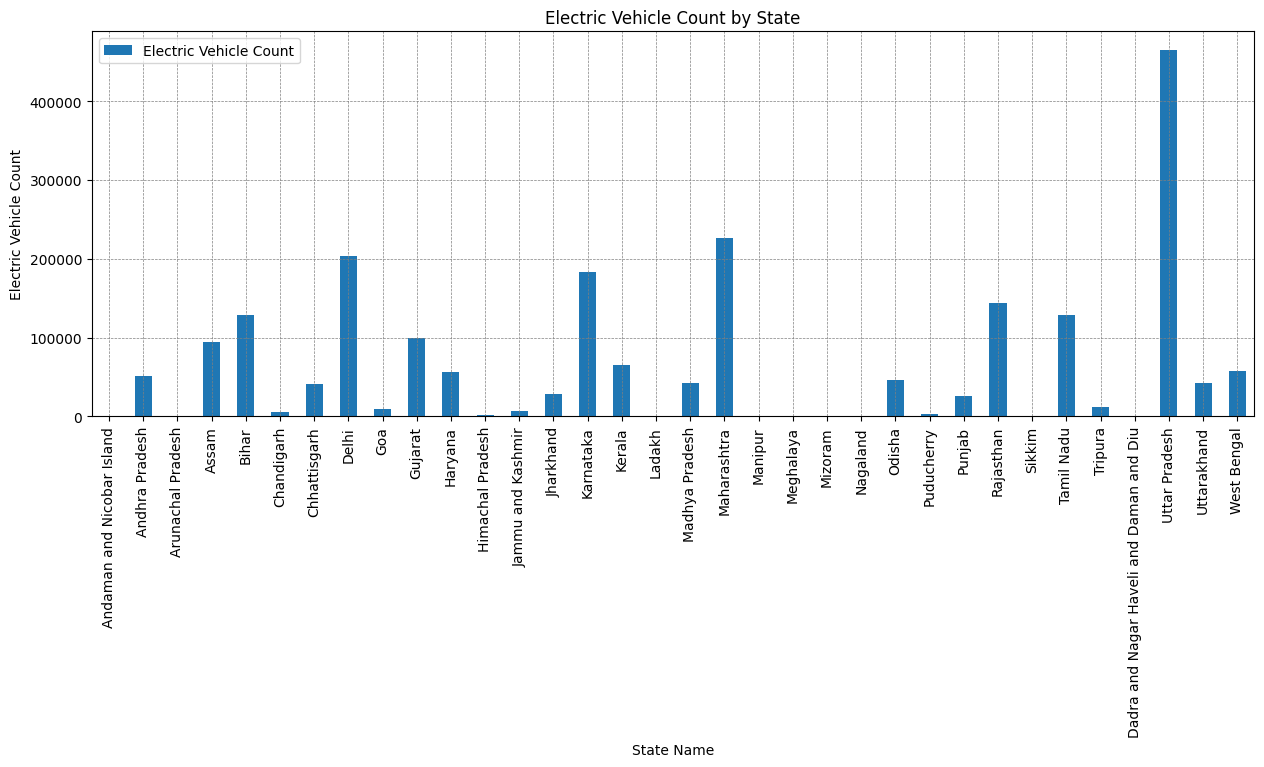

In [6]:
#Barchart of Electric Vehicle Count on y axis and State Name on x axis
x = df4[df4['State Name'] != 'Grand Total'].plot(x='State Name',y='Electric Vehicle Count', kind='bar',figsize = (15,5))
x.grid(color='grey', linestyle='--', linewidth=0.5)

# Setting labels and title
plt.xlabel('State Name')
plt.ylabel('Electric Vehicle Count')
plt.title('Electric Vehicle Count by State')
plt.show()

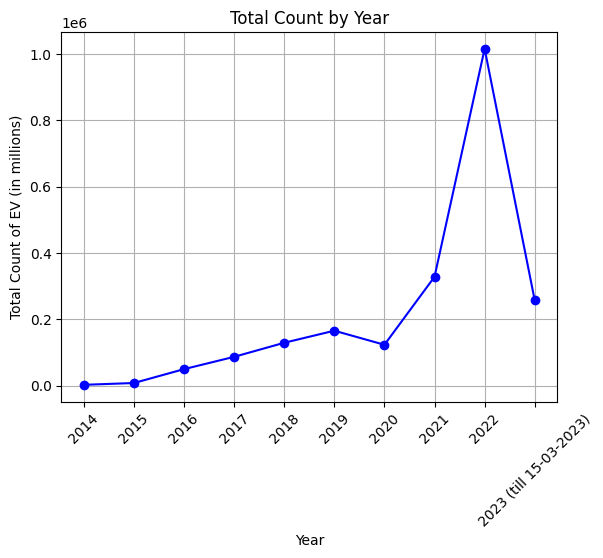

In [7]:
df5_filtered = df5[df5['Year'] != 'Grand Total']

# Plotting the line graph
plt.plot(df5_filtered['Year'], df5_filtered['Total Count'], marker='o', linestyle='-', color='b')
plt.title('Total Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of EV (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

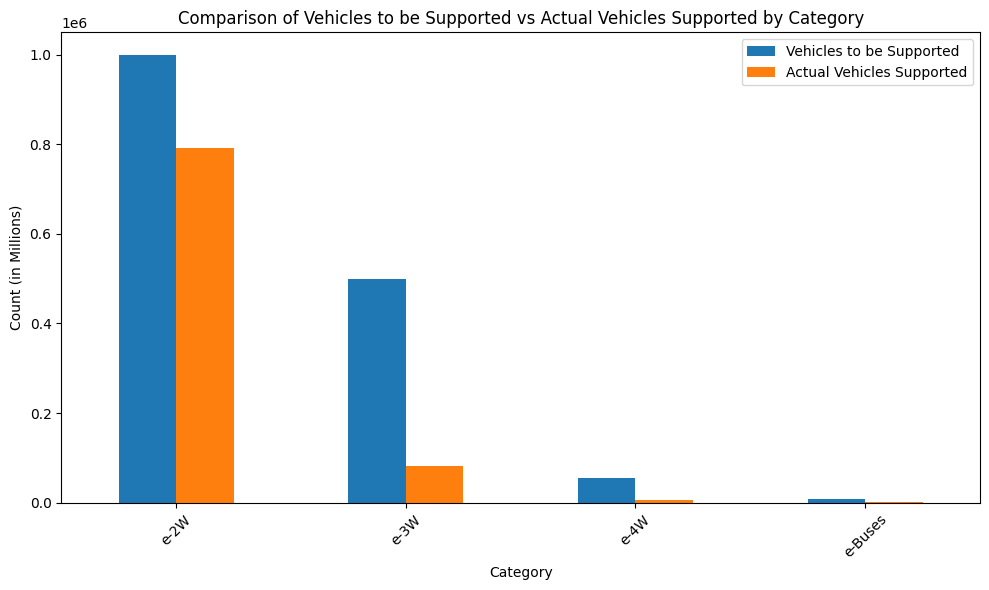

In [8]:
# Filtering out rows where the 'Category' is not 'Total'
filtered_data = df2[df2['Category'] != 'Total']
# Grouping the data by 'Category' and summing up the counts
category_data = filtered_data.groupby('Category').sum()

# Plotting a bar chart
category_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Vehicles to be Supported vs Actual Vehicles Supported by Category')
plt.xlabel('Category')
plt.ylabel('Count (in Millions)')
plt.xticks(rotation=45)
plt.legend(["Vehicles to be Supported", "Actual Vehicles Supported"])
plt.tight_layout()

# Show the plot
plt.show()

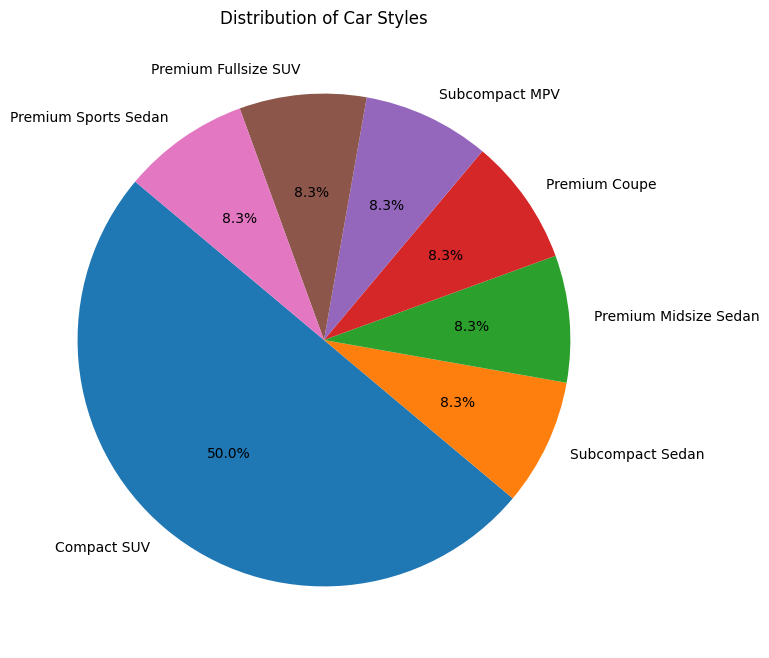

In [9]:
# Grouping the data by 'style' and counting the occurrences
style_counts = df6['Style'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Styles')
plt.show()

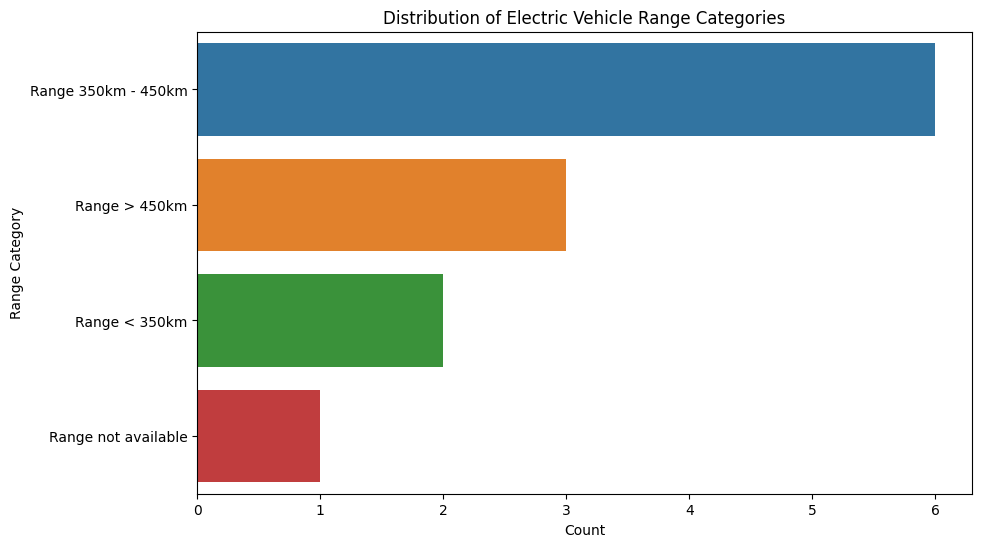

In [10]:
# Define the function to categorize range
def categorize_range(value):
    if 'Km' in value:  # Assuming 'Km' is the unit for the range
        numeric_value = int(value.split(' ')[0])  # Extracting the numeric value
        if numeric_value < 350:
            return 'Range < 350km'
        elif 350 <= numeric_value < 450:
            return 'Range 350km - 450km'
        else:
            return 'Range > 450km'
    else:
        return 'Range not available'

# Apply the categorization function to the 'range' column
df6['Range Category'] = df6['Range'].apply(categorize_range)

# Plotting a count plot for the categorized ranges
plt.figure(figsize=(10, 6))
sns.countplot(y='Range Category', data=df6, order=df6['Range Category'].value_counts().index)
plt.title('Distribution of Electric Vehicle Range Categories')
plt.xlabel('Count')
plt.ylabel('Range Category')
plt.show()


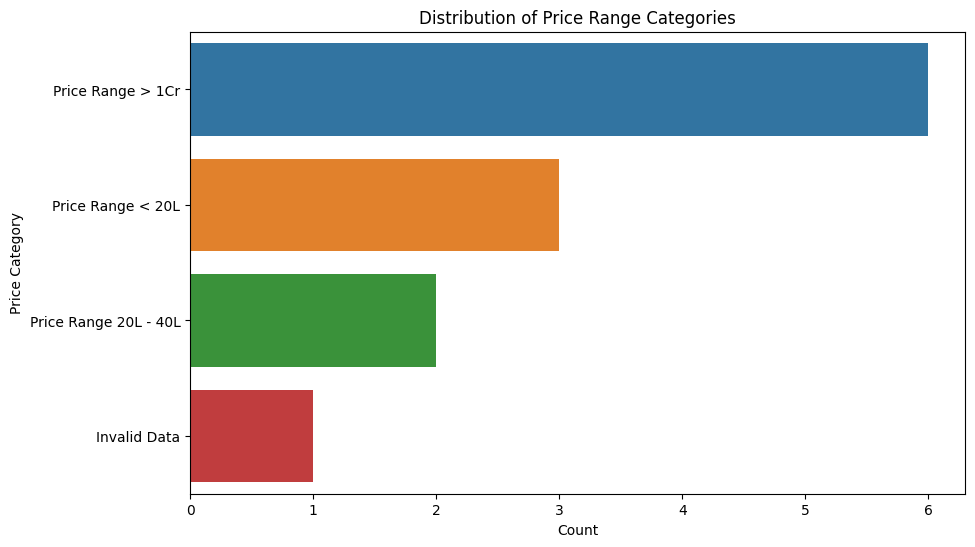

In [11]:
# Define the function to categorize price range
def categorize_price(value):
    try:
        if '₹' in value:
            if 'L' in value:
                price_range = value.split(' - ')
                lower_range = float(price_range[0].split('₹ ')[1].split(' L')[0])
                upper_range = float(price_range[1].split(' L')[0])

                if lower_range < 20:
                    return 'Price Range < 20L'
                elif 20 <= lower_range < 40:
                    return 'Price Range 20L - 40L'
                elif 40 <= lower_range < 80:
                    return 'Price Range 40L - 60L'
                else:
                    return 'Price Range 60L - 1Cr'
            elif 'Cr' in value:
                return 'Price Range > 1Cr'
            else:
                return 'Invalid Data'
        else:
            return 'Invalid Data'
    except IndexError:
        return 'Invalid Data'

# Apply the categorization function to the 'PriceRange' column
df6['Price Category'] = df6['PriceRange'].apply(categorize_price)

# Plotting a count plot for the categorized price ranges
plt.figure(figsize=(10, 6))
sns.countplot(y='Price Category', data=df6, order=df6['Price Category'].value_counts().index)
plt.title('Distribution of Price Range Categories')
plt.xlabel('Count')
plt.ylabel('Price Category')
plt.show()

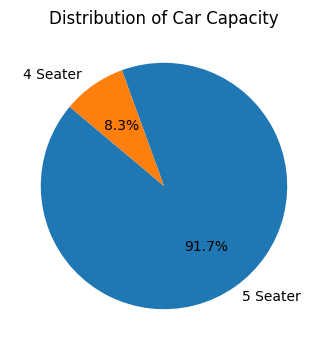

In [12]:
# Grouping the data by 'style' and counting the occurrences
style_counts = df6['Capacity'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4,4))
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Capacity')
plt.show()

# Segmentation Extraction

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('/content/data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

Separating Independent Variable x and dependent variable y

In [15]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

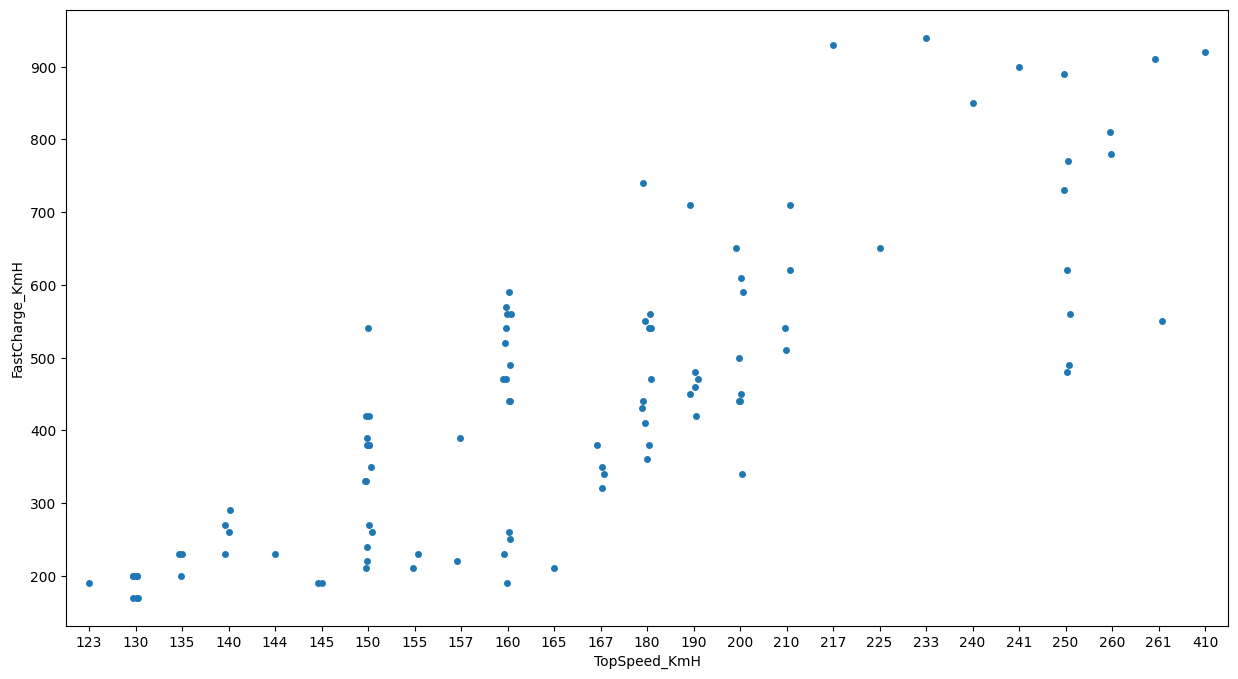

In [16]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

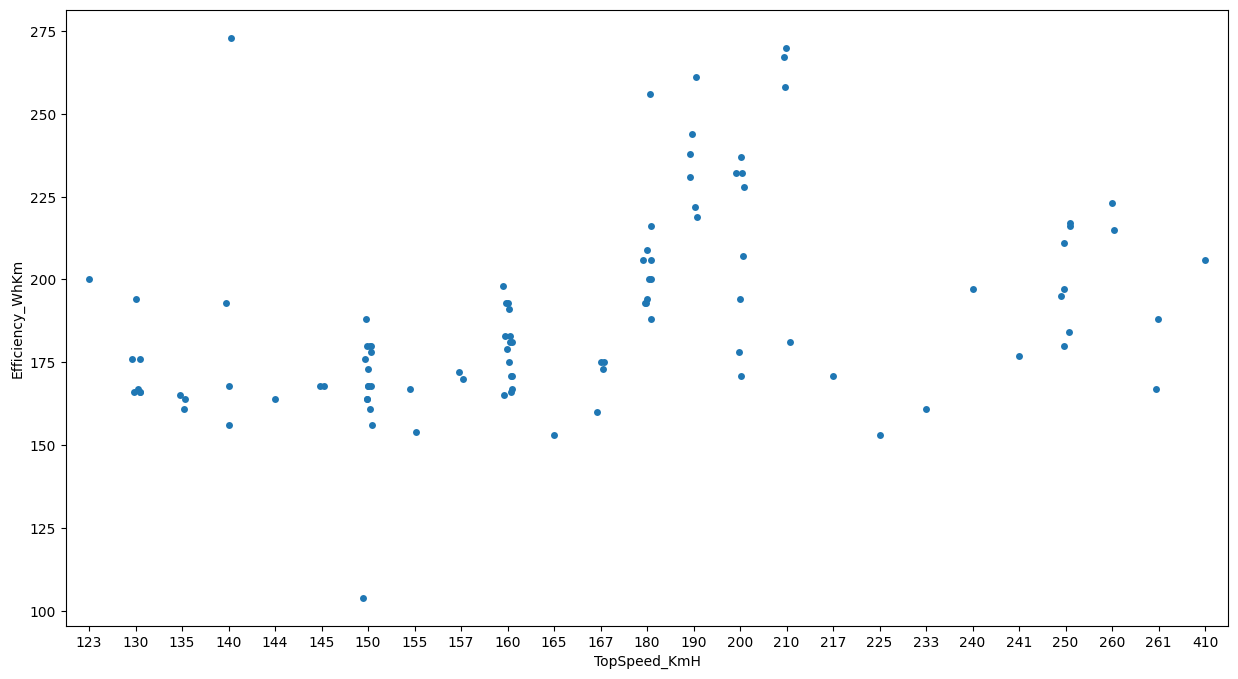

In [17]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [18]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904
...,...,...,...,...,...,...,...,...,...
98,-0.297170,0.446713,-0.463601,0.102542,-0.346005,-0.100457,0.031080,0.202253,0.145390
99,2.335018,0.630747,0.985883,1.560112,-0.817327,-0.121906,0.164115,-0.255651,0.141023
100,0.780642,0.426821,-0.298636,0.708598,0.481728,-0.540071,-0.139753,-0.048733,-0.367509
101,1.540920,0.698754,0.422384,1.094921,-0.298113,-0.307992,-0.363230,0.127251,-0.190397


In [19]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775


In [20]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.396410,0.086150,0.064757,0.058253,0.144548,0.676910,0.412498,0.270655,-0.324562
PC2,0.421973,-0.216762,0.002272,-0.068523,0.038208,0.045212,0.037576,-0.413810,-0.770777
PC3,0.238316,0.330919,0.571780,0.380475,-0.575143,0.024863,0.004703,0.144167,-0.098954
PC4,0.394519,-0.138428,-0.047650,-0.296483,-0.092366,-0.237914,0.728208,0.358365,0.105702
Pc5,0.157195,0.269920,-0.803300,0.395300,-0.292581,0.086978,0.053875,0.040830,-0.056056
PC6,0.389544,-0.024746,-0.076295,-0.387135,-0.032841,0.364461,-0.520811,0.534180,-0.038015
PC7,0.140425,0.801307,0.019535,-0.428983,0.165256,0.086668,0.098379,-0.320750,0.079999
PC8,0.389779,-0.262265,0.073787,0.179862,0.043293,0.558706,0.118043,-0.382139,0.517207
PC9,0.322888,0.180494,0.098293,0.486554,0.722814,-0.149888,-0.019098,0.265275,-0.033267


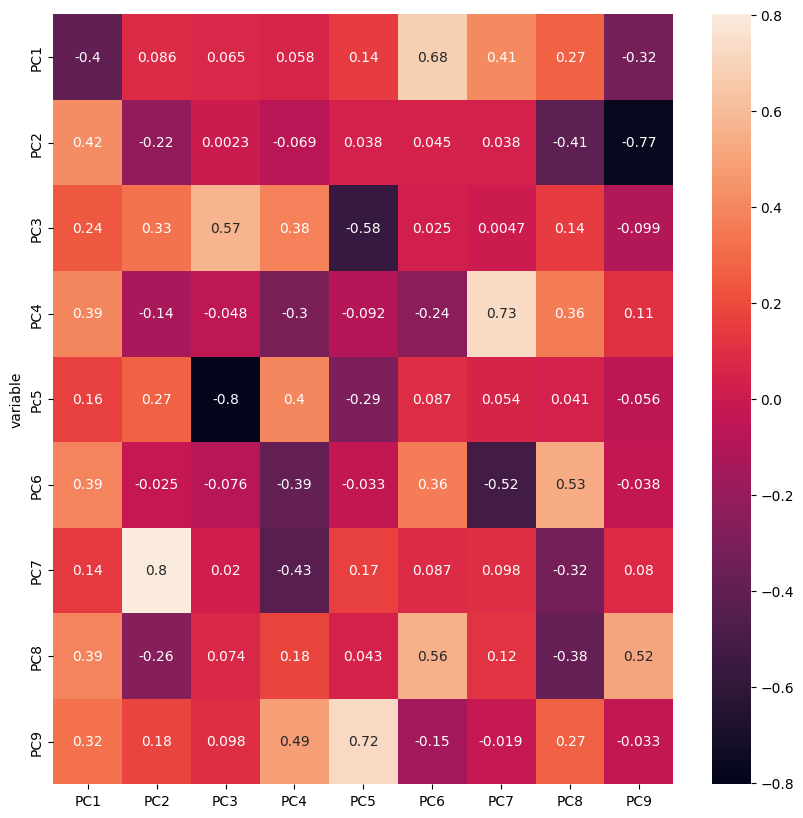

In [21]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (10,10)
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

K-Means Clustering

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_
print (kmeans.labels_)
print (kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]
427.887468451736
5
[[ 3.38080722 -1.38222959 -0.36489344  0.10476922  0.40601443  0.27185359
   0.24199669 -0.10661851  0.04313075]
 [-1.28035008  0.15751337 -0.80380172  0.03882667 -0.26171256  0.0576548
  -0.02518157 -0.04843479 -0.00967151]
 [ 1.47340441  0.75533302  0.44439293  0.22304959  0.00587772 -0.20900642
  -0.04639724  0.13707866  0.00747268]
 [-2.1666201  -0.64972069  1.15112147 -0.52704354  0.24950081  0.04766166
  -0.03574547 -0.05850103 -0.02224405]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


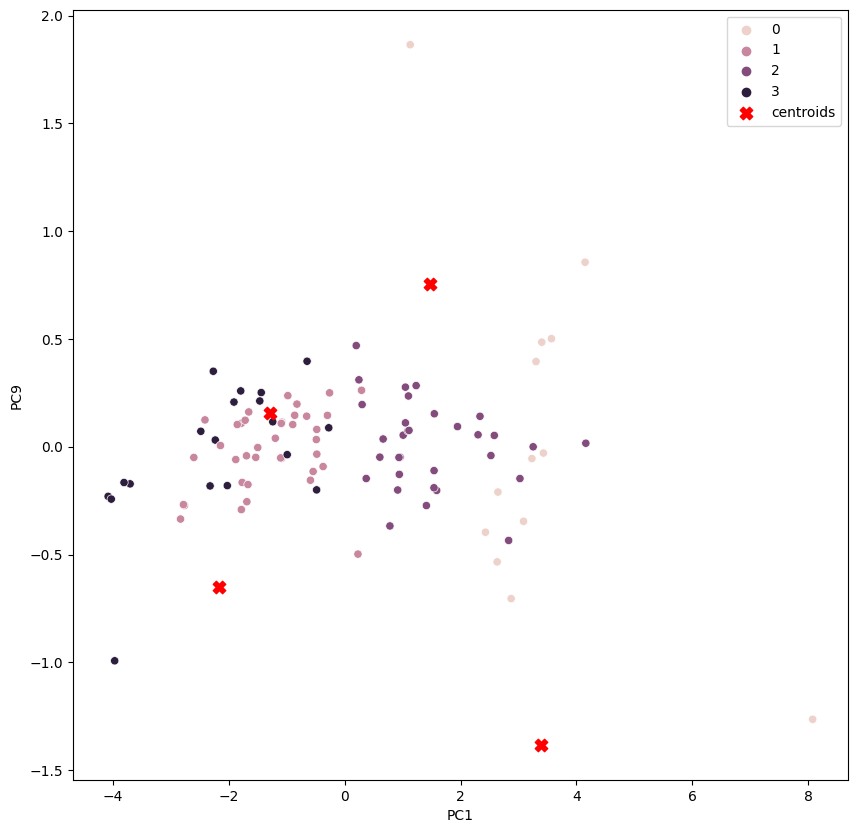

In [23]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()